# Seafloor Spreading Bathymetry and Magnetic Anomalies

**Last week we:**
- Loaded and visualized an earthquake catalog.
- Plotted earthquake magnitude and depth.
- Learned some more complicated mapping techinque. 

**Our goals for today:**
- Practice pandas DataFrames, indexing, and data cleaning.
- Load marine geophysical data (bathymetry and marine magnetic anomalies) from two oceanic ridges.
- Select data and drop rows with gaps.
- Plot bathymetry data and evaluate spreading rate.
- Declare a function to detrend and filter magnetic anomaly data.
- Plot marine magnetic anomaly data and compare spreading rates.


## Setup

Run this cell as it is to setup your environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cartopy import config
import cartopy.crs as ccrs
from scipy import signal

## Marine Geology, Bathymetry and Magnetic Anomalies

We'll look at marine magnetics and bathymetry data from two surveys, from the Mid-Atlantic Ridge and East Pacific Rise.

First we'll load the Atlantic data (that can be accessed here: https://maps.ngdc.noaa.gov/viewers/geophysics/), and then we'll need to clean them up.

<font color=goldenrod>**_To Do_**</font>
- Look at file `vanc05mv.m77t` in `data/`. 
- Ask yourself, what kind of file is this? Would `read_csv` work?

We can make `read_csv` function differently by passing the **sep** argument, which specifies the **separator** between columns in the file. The default is a comma, since **csv** is a **comma separated variable** file.

Other common **sepators** include:
- ' ' a space
- '\t' a tab
- ':' a colon
  
<font color=goldenrod>**_Code for you to write_**</font>

Pass a `sep=` argument to read in the data file successfully.

In [2]:
# Load the seafloor depth, marine mag anom data
#columns ['SURVEY_ID','TIMEZONE','DATE','TIME','LAT','LON','POS_TYPE','NAV_QUALCO','BAT_TTIME','CORR_DEPTH','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT','MAG_TOT2','MAG_RES','MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS','FREEAIR','GRA_QUALCO','LINEID','POINTID']

vanc05mv_data_file = pd.read_csv('data/vanc05mv.m77t',sep='\t')
vanc05mv_data_file.head()

,SURVEY_ID,TIMEZONE,DATE,TIME,LAT,LON,POS_TYPE,NAV_QUALCO,BAT_TTIME,CORR_DEPTH,...,MAG_RESSEN,MAG_DICORR,MAG_SDEPTH,MAG_QUALCO,GRA_OBS,EOTVOS,FREEAIR,GRA_QUALCO,LINEID,POINTID
0,VANC05MV,0,20021208,1901,-33.03604,-71.62559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VANC05MV,0,20021208,1902,-33.03604,-71.62559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VANC05MV,0,20021208,1903,-33.03604,-71.62559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VANC05MV,0,20021208,1904,-33.03604,-71.62559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VANC05MV,0,20021208,1905,-33.03604,-71.62559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can remove whole columns of a dataframe by using the `.drop` method on the dataframe and passing a **list** of columns to remove as `dataframe_name.drop(columns=['ColumnToRemove1','ColumnToRemove2'])`
                
<font color=goldenrod>**_Code for you to write_**</font>     

Use the `.drop` method to remove both columns `SURVEY_ID` and `TIMEZONE`

In [3]:
cols_to_drop = ['SURVEY_ID', 'TIMEZONE']
vanc05mv_data_file.drop(columns=cols_to_drop)

,DATE,TIME,LAT,LON,POS_TYPE,NAV_QUALCO,BAT_TTIME,CORR_DEPTH,BAT_CPCO,BAT_TYPCO,...,MAG_RESSEN,MAG_DICORR,MAG_SDEPTH,MAG_QUALCO,GRA_OBS,EOTVOS,FREEAIR,GRA_QUALCO,LINEID,POINTID
0,20021208,1901,-33.03604,-71.62559,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20021208,1902,-33.03604,-71.62559,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20021208,1903,-33.03604,-71.62559,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20021208,1904,-33.03604,-71.62559,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20021208,1905,-33.03604,-71.62559,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26946,20021227,1256,-33.90343,18.42323,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26947,20021227,1257,-33.90343,18.42323,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26948,20021227,1258,-33.90344,18.42322,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26949,20021227,1259,-33.90343,18.42322,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purposes of today's notebook, we will **drop** all of the following columns: `['SURVEY_ID','TIMEZONE','DATE','TIME','POS_TYPE','NAV_QUALCO','BAT_TTIME','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT2','MAG_RES','MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS','FREEAIR','GRA_QUALCO','LINEID','POINTID']`. 

<font color=goldenrod>**_Code for you to write_**</font>

Drop these columns and save this as a new dataframe called `atlantic_data`.

In [4]:
cols_to_drop = ['SURVEY_ID','TIMEZONE','DATE','TIME','POS_TYPE','NAV_QUALCO','BAT_TTIME','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT2','MAG_RES','MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS','FREEAIR','GRA_QUALCO','LINEID','POINTID']
print(f'droping {len(cols_to_drop)} of {len(vanc05mv_data_file.columns)} columns')
atlantic_data=vanc05mv_data_file.drop(columns=cols_to_drop)
atlantic_data.head()

droping 22 of 26 columns


,LAT,LON,CORR_DEPTH,MAG_TOT
0,-33.03604,-71.62559,NaN,NaN
1,-33.03604,-71.62559,NaN,NaN
2,-33.03604,-71.62559,NaN,NaN
3,-33.03604,-71.62559,NaN,NaN
4,-33.03604,-71.62559,NaN,NaN


Remember from the week 2 assignment, "NaN" stands for Not a Number. These values aren't very useful to us, so we will need to remove them.

We can use the `.describe` method to show some basic statistics about our dataset.

In [5]:
atlantic_data.describe()

,LAT,LON,CORR_DEPTH,MAG_TOT
count,26951.000000,26951.000000,25010.000000,14028.000000
mean,-47.071392,-36.939197,3018.086765,26557.261762
std,6.643869,32.681119,1446.118658,1157.487595
min,-56.018980,-76.166600,76.000000,24852.000000
25%,-52.042025,-72.776660,1764.000000,25434.000000
50%,-49.004340,-40.010090,3267.500000,26358.000000
75%,-41.646480,-6.273700,4248.000000,27472.000000
max,-32.989350,18.437850,5370.000000,29206.000000


Now we can start cleaning the data. Let's get rid of the "NaN"s. We can use some **"Boolean"** functions as **"masks"**. **Booleans** are **True** or **False** values. Read more about [Booleans here]( https://realpython.com/python-boolean/).

A **mask** is a way to hide/remove certain parts of an array. 

If we take an array and use that to construct a **Boolean array** of **True** and **False** values, we can then use that to **mask** the original array, where the **True** values are kept, and the **False** values are discarded, like in the figure below

<img src="Figures/BooleanMask.png" width=900>

We'll use `~np.isnan` to construct a **Boolean** array of where is and isn't "NaN". We will then use the Boolean array to **mask** the input array. 

`np.isnan` is a numpy function that applies the Boolean **test** of **is it True or False that this value is equal to NaN?**

The `~` essentially flips the answers from True to False, and from False to True. We use this because we don't want where is a NaN, but where isn't a NaN.

We can use this to
to select rows were we have depth AND magnetic field measurements.

We'll use `~np.isnan` to select rows were we have depth AND magnetic field measurements.

---
Looking back, there are NaNs in both the `CORR_DEPTH` and the `MAG_TOT` columns.

First, let's use this to remove NaNs from the `CORR_DEPTH` column.

Let's build the Boolean array of where is and isn't equal to NaN

In [6]:
~np.isnan(atlantic_data['CORR_DEPTH'])

0        False
1        False
2        False
3        False
4        False
         ...  
26946    False
26947    False
26948    False
26949    False
26950    False
Name: CORR_DEPTH, Length: 26951, dtype: bool

Remember that we apply boolean masks as `masked_dataframe = dataframe_name[mask]`, and the **mask** is the **list** of True and False values created above.

<font color=goldenrod>**_Code for you to write_**</font>

Apply this as a mask to the data.

In [7]:
atlantic_data_clean = atlantic_data[~np.isnan(atlantic_data['CORR_DEPTH'])]
atlantic_data_clean.head()

,LAT,LON,CORR_DEPTH,MAG_TOT
200,-33.31108,-71.99163,1147.0,NaN
201,-33.31394,-71.99329,1149.0,NaN
202,-33.31676,-71.99489,1152.0,NaN
203,-33.31964,-71.99652,1168.0,NaN
204,-33.32254,-71.99821,1199.0,NaN


Look, no NaNs!

---
Now we can apply this to both the `CORR_DEPTH` and the `MAG_TOT` columns at the same time.

We use an ampersand `&` to mean **AND** which allows us to apply two **conditions**, which are our **masks**, at the same time.

The `&` is a **Logical operator**. Learn more aout [logical operators here](https://www.statology.org/and-operator-in-pandas/).

Go ahead and add the two conditions in below.

<font color=goldenrod>**_Code for you to write_**</font>

In [8]:
atlantic_data_clean = atlantic_data[~np.isnan(atlantic_data['CORR_DEPTH'])&~np.isnan(atlantic_data['MAG_TOT'])]
print(atlantic_data_clean.shape)
atlantic_data_clean.head()

(14027, 4)


,LAT,LON,CORR_DEPTH,MAG_TOT
11204,-53.15271,-51.62174,2376.0,29206.0
11205,-53.15178,-51.61709,2394.0,29206.0
11206,-53.15079,-51.61217,2373.0,29205.0
11207,-53.14974,-51.60716,2358.0,29204.0
11208,-53.14873,-51.60215,2332.0,29203.0


In [9]:
# Poking around and testing a different way of doing this
at_clean = vanc05mv_data_file
cols = at_clean.columns
drop_cols = [col for col in cols if col not in ['LAT','LON','CORR_DEPTH','MAG_TOT']]
print(f'dropping {len(drop_cols)} columns')
at_clean = at_clean.drop(columns=drop_cols)
at_clean = at_clean.dropna()
at_clean.head()

dropping 22 columns


,LAT,LON,CORR_DEPTH,MAG_TOT
11204,-53.15271,-51.62174,2376.0,29206.0
11205,-53.15178,-51.61709,2394.0,29206.0
11206,-53.15079,-51.61217,2373.0,29205.0
11207,-53.14974,-51.60716,2358.0,29204.0
11208,-53.14873,-51.60215,2332.0,29203.0


Let's take a look at our data!

In [10]:
atlantic_data_clean.describe()

,LAT,LON,CORR_DEPTH,MAG_TOT
count,14027.000000,14027.000000,14027.000000,14027.00000
mean,-47.720326,-16.801461,3928.335638,26557.35282
std,4.564983,19.269079,794.104704,1157.47861
min,-53.152710,-51.621740,1625.000000,24852.00000
25%,-51.648660,-33.622330,3393.000000,25434.00000
50%,-49.378000,-15.446450,4028.000000,26358.00000
75%,-44.288285,0.384325,4515.000000,27472.00000
max,-37.232890,13.553150,5370.000000,29206.00000


<font color=goldenrod>**_Code for you to write_**</font>

- Plot atlantic_data on a map and make it have a linewidth of 2 and a color of orange 
- Plot atlantic_data_clean on the same map and make it have a linewidth of 4 and a color of red

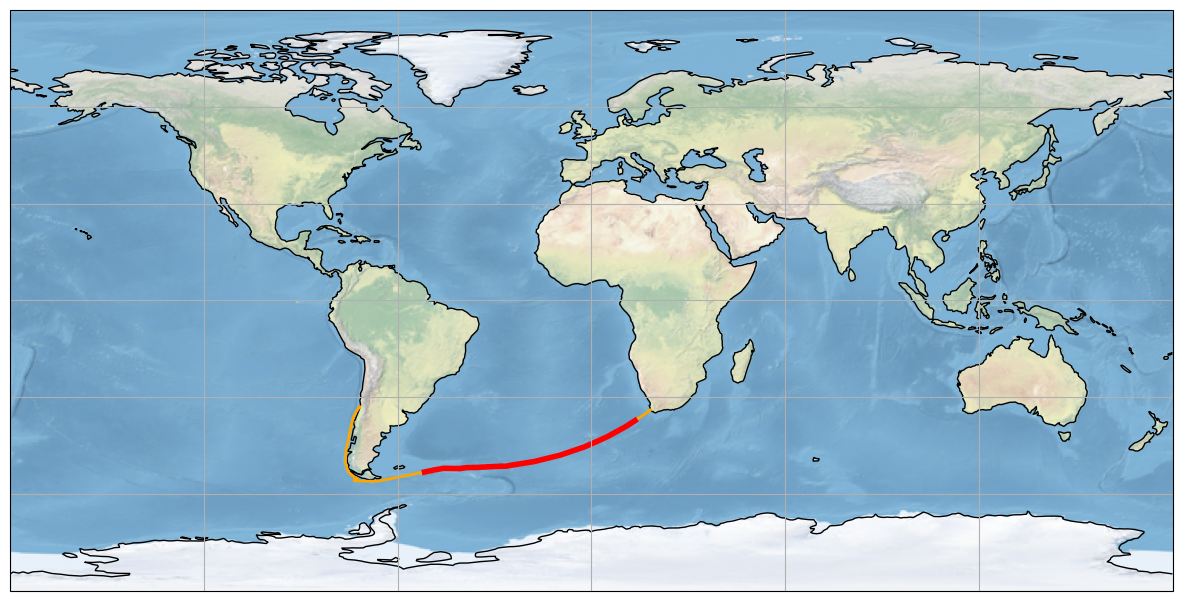

In [11]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.plot(atlantic_data['LON'], atlantic_data['LAT'],transform=ccrs.PlateCarree(), linewidth=2, color='orange')
ax.plot(atlantic_data_clean['LON'], atlantic_data_clean['LAT'],transform=ccrs.PlateCarree(), linewidth=4, color='red')
ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

Now let's plot the data along this track. Here, we use `subplot` to create two subfigures, one of longitude and bathymetry, and the other of longitude and magnetic field strength.

<font color=goldenrod>**_Code for you to write_**</font>
- On `ax1` plot atlantic_data_clean `LON` versus -1*`CORR_DEPTH`
- On `ax2` plot atlantic_data_clean `LON` versus `MAG_TOTAL`

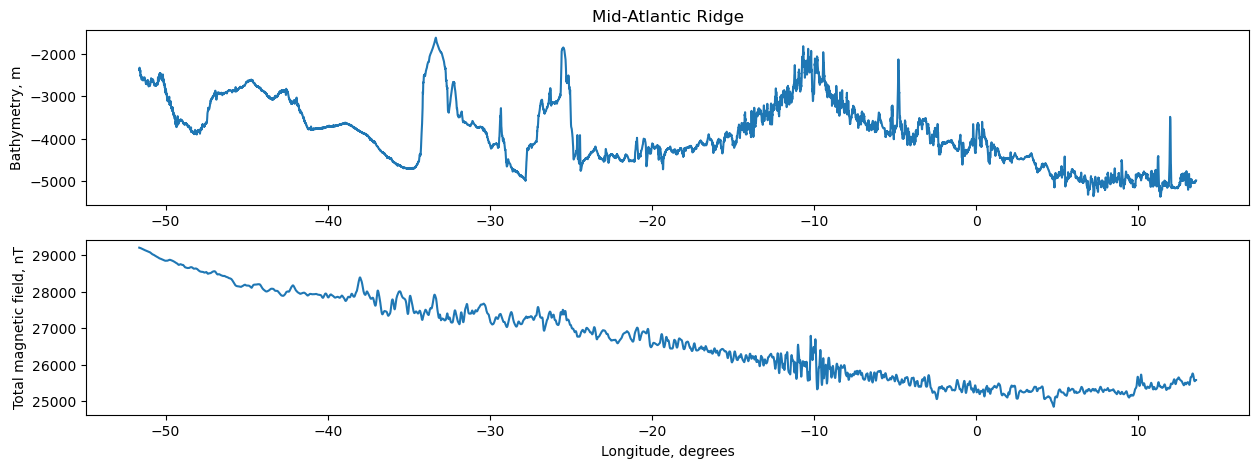

In [36]:
plt.figure(1,(15,5))
ax1=plt.subplot(2, 1, 1)
ax1.plot(atlantic_data_clean['LON'], -1*atlantic_data_clean['CORR_DEPTH'])
ax1.set_ylabel('Bathymetry, m')
ax1.set_title('Mid-Atlantic Ridge')

ax2=plt.subplot(2, 1, 2)
ax2.plot(atlantic_data_clean['LON'], atlantic_data_clean['MAG_TOT'])
ax2.set_xlabel('Longitude, degrees')
ax2.set_ylabel('Total magnetic field, nT')

plt.show()

Here's a map of where our survey line was collected with a grid of seafloor bathymetry in the background.

<img src="Figures/MAR_track_map.png" width=900>

Let's just analyze the portion of the survey from around the ridge, so from longitudes **-24.0** to **0.0** degrees. 

<font color=goldenrod>**_Code for you to write_**</font>

Use Boolean indexing to mask rows of `atlantic_data_clean` and **keep** where `atlantic_data_clean['LON']` is between -24 and 0 degrees

In [13]:
atlantic_data_cropped = atlantic_data_clean[(atlantic_data_clean['LON']>=-24)&(atlantic_data_clean['LON']<0)]
print(atlantic_data_cropped.shape)
atlantic_data_cropped.head()

(5094, 4)


,LAT,LON,CORR_DEPTH,MAG_TOT
16540,-50.93929,-23.99902,4444.0,27007.0
16541,-50.93844,-23.99362,4452.0,27006.0
16542,-50.93759,-23.98818,4456.0,27004.0
16543,-50.93677,-23.98275,4459.0,27001.0
16544,-50.93595,-23.97731,4465.0,26998.0


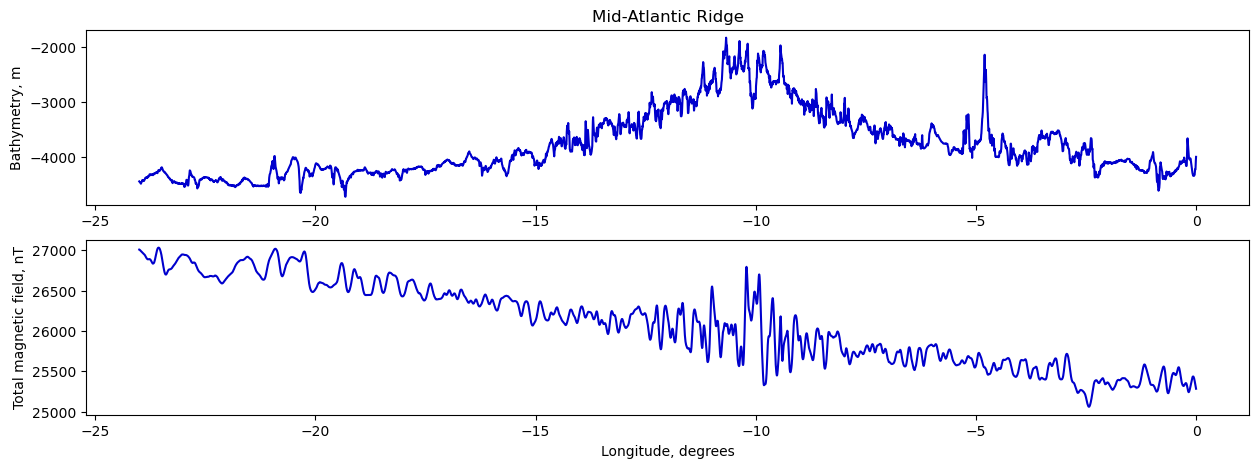

In [14]:
plt.figure(1,(15,5))
ax1=plt.subplot(2, 1, 1)
ax1.plot(atlantic_data_cropped['LON'],-1*atlantic_data_cropped['CORR_DEPTH'],color='mediumblue');
ax1.set_ylabel('Bathymetry, m');
ax1.set_title('Mid-Atlantic Ridge')

ax2=plt.subplot(2, 1, 2)
ax2.plot(atlantic_data_cropped['LON'],atlantic_data_cropped['MAG_TOT'],color='mediumblue');
ax2.set_xlabel('Longitude, degrees');
ax2.set_ylabel('Total magnetic field, nT');

I used another program called [GMT project](https://docs.generic-mapping-tools.org/6.1/project.html) to project the latitude and longitude coordinates to distance from the ridge along the ship track azimuth -- let's load that projected dataset. 

Take a look at `data/projected_vanc05mv.csv`. Notice that the columns don't have labels. Instead, we can use `read_csv` and pass the argument `names=[list_of_names]` to name the columns.

<font color=goldenrod>**_Code for you to write_**</font>
- Use pd.read_csv to read in `data/projected_vanc05mv.csv`
- Name the columns `'DIST'`, `'DEPTH'`, and `'MAG_TOT'`

In [37]:
provided_cols=['DIST', 'DEPTH', 'MAG_TOT']
projected_atlantic_data = pd.read_csv('data/projected_vanc05mv.csv', names=provided_cols)
projected_atlantic_data.head()

,DIST,DEPTH,MAG_TOT
0,-1055.2,4448,27011
1,-1054.8,4446,27009
2,-1054.4,4444,27007
3,-1054.0,4452,27006
4,-1053.6,4456,27004


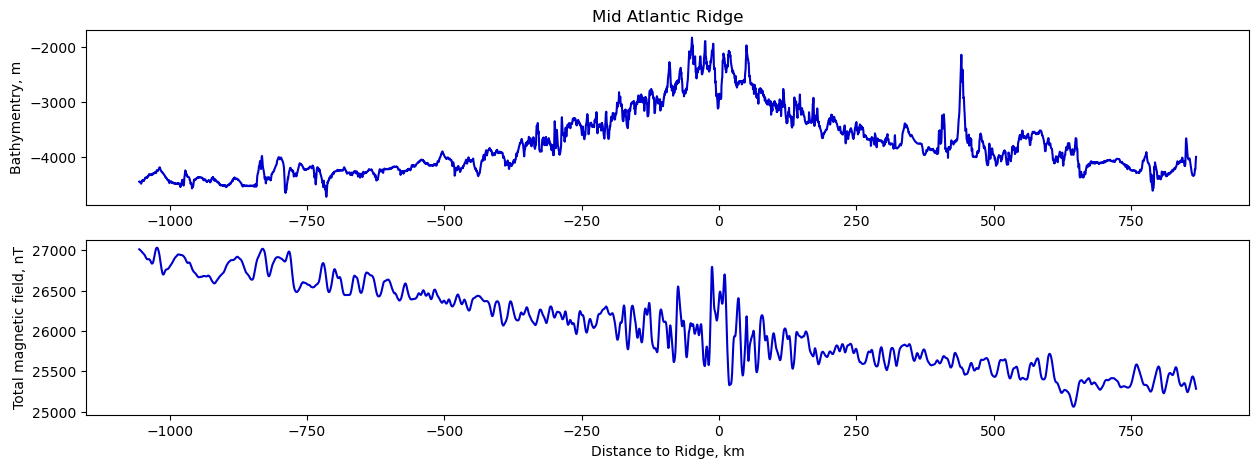

In [38]:
plt.figure(1,(15,5))
ax1=plt.subplot(2, 1, 1)
ax1.plot(projected_atlantic_data['DIST'],-1*projected_atlantic_data['DEPTH'],color='mediumblue');
ax1.set_title('Mid Atlantic Ridge')
ax1.set_ylabel('Bathymentry, m');

ax2=plt.subplot(2, 1, 2)
ax2.plot(projected_atlantic_data['DIST'],projected_atlantic_data['MAG_TOT'],color='mediumblue');
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Total magnetic field, nT');

Now we're doing to do that again from the beginning, but using data collected over the East Pacific Rise. (https://catalog.data.gov/dataset/multibeam-collection-for-nbp9707-multibeam-data-collected-aboard-nathaniel-b-palmer-from-1997-1). 

This time we'll select date from Longitudes between -126.0 and -95.0 degrees.

<font color=goldenrod>**_Code for you to write_**</font>
- Open `data/nbp9707.m77t` and check how it is formatted
- Use `pd.read_csv` to read in the data **(use the correct separator)**
- Drop the following columns and save the data as a new dataframe `'SURVEY_ID','TIMEZONE','DATE','TIME','POS_TYPE','NAV_QUALCO','BAT_TTIME','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT2','MAG_RES','MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS','FREEAIR','GRA_QUALCO','LINEID','POINTID'`
- Use a mask to remove the NaN values and save this as a new **clean** dataframe
- Use a mask to crop the dataframe include longitudes only >=-126 and <=-95 and save this as a new **cropped** dataframe

In [39]:
# Load the seafloor depth, marine mag anom data
pacific_data_file = pd.read_csv('data/nbp9707.m77t', sep='\t')
pacific_data = pacific_data_file.drop(columns=[col for col in cols if col not in ['LAT','LON','CORR_DEPTH','MAG_TOT']])
pacific_data_clean = pacific_data.dropna()
print(pacific_data_clean.shape)
pacific_data_cropped = pacific_data_clean[(pacific_data_clean['LON']>=-126)&(pacific_data_clean['LON']<=-95)]

(23870, 4)


Here's a map of where our survey line was collected with a grid of seafloor bathymetry in the background.

<img src="Figures/EPR_track_map.png" width=900>

Let's introduce some more colours, for example `tomato`. You can find the available [colour names here](https://matplotlib.org/stable/gallery/color/named_colors.html)

<font color=goldenrod>**_Code for you to write_**</font>
- On `ax1` plot pacific_data_cropped `LON` versus -1*`CORR_DEPTH`
- On `ax2` plot pacific_data_cropped `LON` versus `MAG_TOTAL`

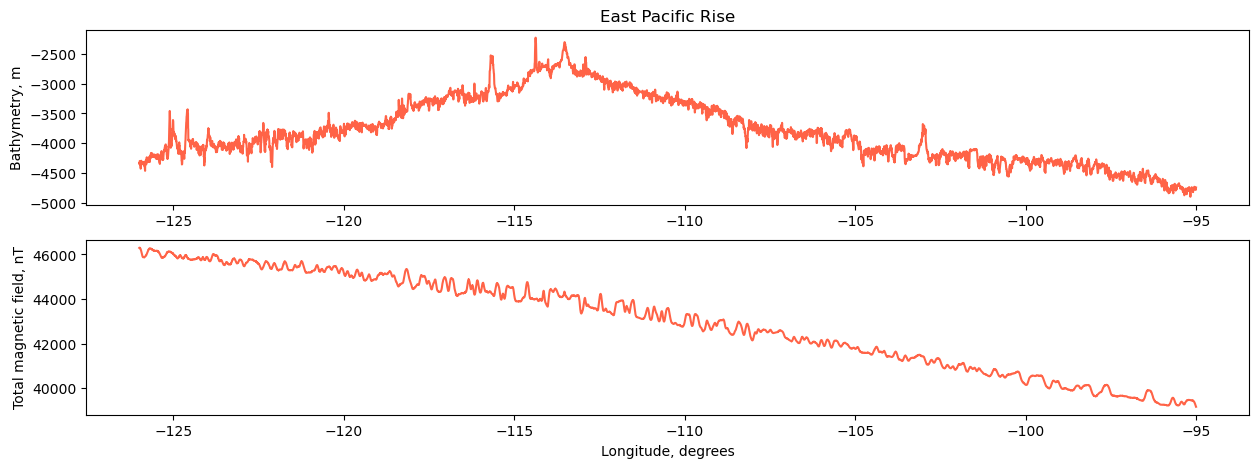

In [47]:
plt.figure(1,(15,5))
ax1=plt.subplot(2, 1, 1)
ax1.plot(pacific_data_cropped['LON'], -1*pacific_data_cropped['CORR_DEPTH'], color='tomato')
ax1.set_ylabel('Bathymetry, m');
ax1.set_title('East Pacific Rise')

ax2=plt.subplot(2, 1, 2)
ax2.plot(pacific_data_cropped['LON'], pacific_data_cropped['MAG_TOT'], color='tomato')
ax2.set_xlabel('Longitude, degrees');
ax2.set_ylabel('Total magnetic field, nT');

Again, I used the GMT (genertic mapping tools) software to project the latitude and longitude coordinates to distance from the ridge along the ship track azimuth -- let's load that. 

In [48]:
projected_pacific_data = pd.read_csv('data/projected_nbp9707.csv',names=['DIST','DEPTH','MAG_TOT'])
projected_pacific_data

,DIST,DEPTH,MAG_TOT
0,1320.6,4782.3,39467
1,1319.9,4751.2,39466
2,1319.9,4757.8,39463
3,1319.2,4805.5,39462
4,1319.2,4808.0,39459
...,...,...,...
6897,-973.9,4303.6,46302
6898,-973.9,4352.5,46300
6899,-974.6,4346.5,46304
6900,-974.6,4334.0,46296


### Bathymetry

Now let's compare the two ridges' bathymetry. 

<font color=goldenrod>**_Code for you to write_**</font>
- On `ax1` plot projected_pacific_data `DIST` versus -1*`DEPTH`
- On `ax2` plot projected_atlantic_data `DIST` versus -1*`DEPTH`
- Use a different `color` for each plot 
- On each of `ax1` and `ax2` use `ax1.set_xlim` to set x-limits between -1000 and 1000
- On each of `ax1` and `ax2` use `ax1.set_ylim` to set y-limits between -5000 and -1500


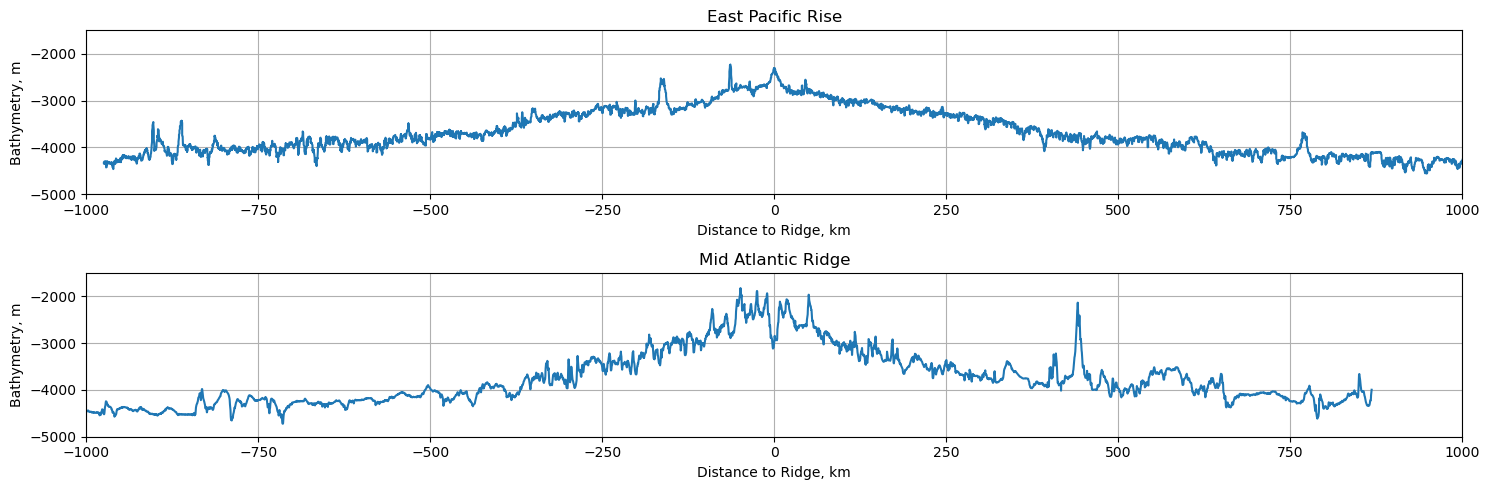

In [52]:
plt.figure(1,(15,5))
ax1 = plt.subplot(2,1,1)
ax1.plot(projected_pacific_data['DIST'], projected_pacific_data['DEPTH']*-1)
ax1.set_xlim(-1000,1000)
ax1.set_ylim(-5000,-1500)
ax1.set_xlabel('Distance to Ridge, km') # labels!
ax1.set_ylabel('Bathymetry, m')
ax1.set_title('East Pacific Rise')
ax1.grid()

ax2 = plt.subplot(2,1,2)
ax2.plot(projected_atlantic_data['DIST'], projected_atlantic_data['DEPTH']*-1)
ax2.set_xlim(-1000,1000)
ax2.set_ylim(-5000,-1500)
ax2.set_xlabel('Distance to Ridge, km')
ax2.set_ylabel('Bathymetry, m')
ax2.set_title('Mid Atlantic Ridge')
ax2.grid()

plt.tight_layout()

<img src="Figures/spreading_ridges.png" width=900>
> Source: Essentials of Geology (13th Edition) Lutgens, Tarbuck, and Tasa.

<font color=red>**_Discussion Questions:_**</font> What do you observe in the bathymetry? Do these ridges have a rift valley at the center? Is the slope steep or gentle? Is the bathymetry rough or smooth?

<font color=blue>**_Response:_**</font> It appears it the **Pacific** does not have a rift valley at the center and is very gentle, smooth slopes. This indicates it is fast moving. The **Atlantic** does have a valley and is steaper and rough. 

<font color=red>**_Discussion Questions:_**</font> Based on the ridge bathymetry, which spreading center do you think is spreading faster the Atlantic (blue) or Pacific (red)?

<font color=blue>**_Response:_**</font> Pacific is faster.

### Crustal Magnetic Field

Now let's compare their marine magnetic field data.

Make a plot of the magnetic field from each ridge (['MAG_TOT']). Follow the code above for the bathymetry. Be sure to include axis labels.

```
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Total Field, nT');
ax2.set_title('Mid Atlantic Ridge');
```

<font color=goldenrod>**_Code for you to write_**</font>
- On `ax1` plot projected_pacific_data `DIST` versus `MAG_TOTAL`
- On `ax2` plot projected_atlantic_data `DIST` versus `MAG_TOTAL`
- Use a different `color` for each plot 
- On each of `ax1` and `ax2` use `ax1.set_xlim` to set x-limits between -1000 and 1000
- On each of `ax1` and `ax2` use `ax1.set_ylim` to set appropriate y-limits
- Use `set_xlabel`, `set_ylabel`, and `set_title` to set appropriate labels and a title


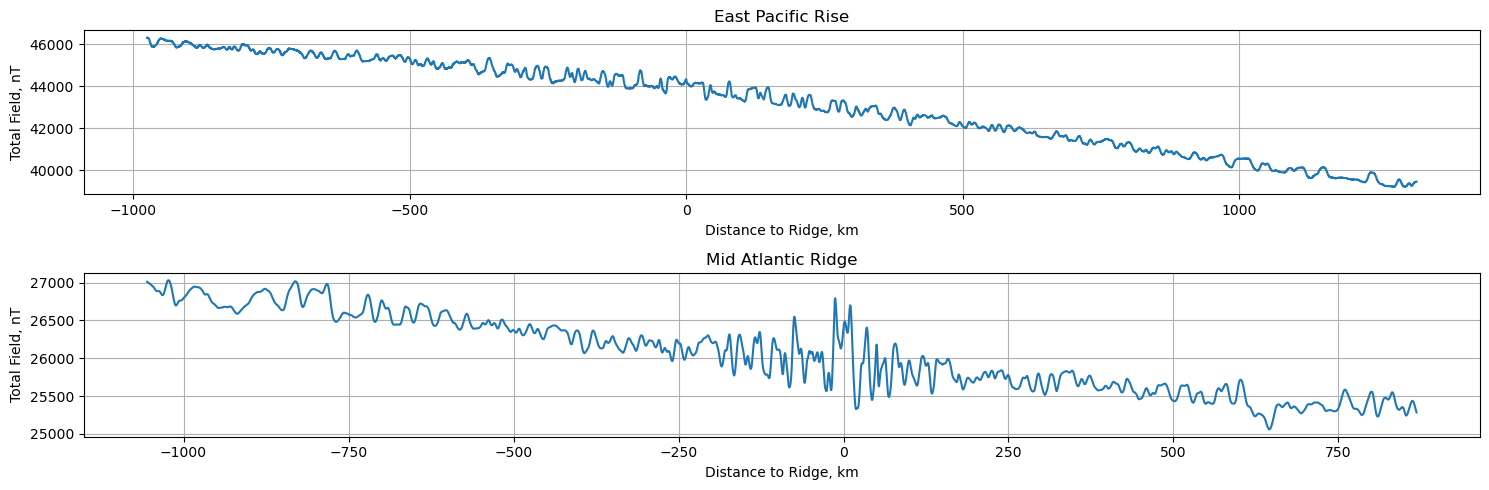

In [57]:
#Plot the magnetic field (follow the depth example but change what you're plotting on the y-axis)

plt.figure(1,(15,5))
ax1 = plt.subplot(2,1,1)
ax1.plot(projected_pacific_data['DIST'], projected_pacific_data['MAG_TOT'])
ax1.set_xlabel('Distance to Ridge, km');
ax1.set_ylabel('Total Field, nT');
ax1.set_title('East Pacific Rise');
ax1.grid()

ax2 = plt.subplot(2,1,2)
ax2.plot(projected_atlantic_data['DIST'], projected_atlantic_data['MAG_TOT'])
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Total Field, nT');
ax2.set_title('Mid Atlantic Ridge');
ax2.grid()

plt.tight_layout()

## Functions

We can define our own functions. A function is just like those that we've used, such as `read_csv()`: it takes input arguments, performs a process, and produces an output. In the case of `output_array=read_csv('input_file.csv')`, it reads in the csv file given as the argument, converts it to columns, and returns that to output_array.

### Anatomy of a function
- `def` statement: this defines the function name and the arguments it takes as -- `def function_name(argument1,argument2,...argument_n):`
- **NOTE** the `:` at the end of the `def` statement is **essential**
- An **indentation**: all of the code after the `def` statement and **within** the function must be indented by the same amount. That might be one tab, one space, or many spaces. **It must be the same throughout**.
- A `docstring`: this is the documentation for the function and is written as `""" words """`
- OPTIONAL: A `return` statement: this is written at the end of a function to **return** a value to the user. For example, the mathematical operation `4+3` would return a value of `7`.

### An example function
This function performs a mathematical operation and `return`s a value

In [58]:
def do_a_sum():
    """
    Do a specific sum.
    """
    return 4+3

Take a look at the function and answer the following questions:
- What does the function do?
- What is the `indentation`?
- How many `arguments` does the fuction take?
- What does the fuction `return`?

We can call this function.

In [59]:
do_a_sum()

7

We can capture the `returned` value and save it as a new variable.

In [60]:
summed_val=do_a_sum()
print(summed_val)

7


We can access it's docstring too.

In [25]:
do_a_sum?

Signature: do_a_sum()
Docstring: Do a specific sum.
File:      /tmp/ipykernel_256326/3894617017.py
Type:      function

Look at what happens if we try to pass an argument to the function.

In [61]:
do_a_sum()

7

If we want this function to take an argument, we have to **define** it to expect an argument.

In [62]:
def do_some_sum(a):
    """
    Do a more general sum.
    """
    return a+3

Now, when we pass an argument to this function, see what happens.

In [63]:
summed_val=do_some_sum(4)
print (summed_val)

7


<font color=goldenrod>**_Code for you to write_**</font>

Use the example function above to create a function called `do_any_sum` that takes two arguments, `a` and `b`, and calculates the sum of these, and `returns` that value. Add a `docstring` to describe what it does.

In [73]:
def do_any_sum(a, b):
    '''
    Returns the sum of a and b

    Vars (numeric):
        a: first number
        b: second number
    Returns:
    '''
    try:
        return a+b
    except ValueError:
        print("Error: Invalid number format!")
    except TypeError:
        print("Error: Unsupported operation!")
    except Exception as e:
        print(f"An error occurred: {e}")

do_any_sum(3,'a6')

Error: Unsupported operation!


Now, we're going to make a more complex function. Here, I'm defining a new function `total2anom` to process these total magnetic field measurements into magnetic anomaly by removing the background drift.

In [78]:
def total_to_anomaly(total_mag, distance):
    """
    Simple function (i.e. too simple as it doesn't use knowledge of background field from observatory) to process 
    measured total magnetic field to magnetic anomaly. Detrends and highpass filters the total field.
    
    parameters
    ----------
    total_mag : total magnetic field measurement
    distance : distance from the ridge in km
    
    output
    ------
    filtered_anom : marine magnetic anomaly (detrended and filtered total field)
    """
    total_detrended = signal.detrend(total_mag); # detrend to remove drift
    sample_dist = np.mean(abs(distance.values[1:]-distance.values[0:-1])); # determine sample spacing
    fs = 1/sample_dist; # sampling frequency in km^-1
    fN = fs *0.5; # Nyquist frequency
    # design filter coefficents for highpass filter - 0 to 1/500km filtered, 1/450km to fN passed, 
    # remove nonlinear drift
    filter_coefs = signal.remez(1001, [0, 0.002, 0.00222, fN], [0, 1], fs=fs);
    # apply the filter to the detrended anomaly
    filtered_anom = signal.filtfilt(filter_coefs, [1], total_detrended, padlen=len(total_detrended)-1)
    
    return filtered_anom

<font color=goldenrod>**_Code for you to write_**</font>
- Read the function to see what data it takes and what it returns
- Use the function `total_to_anomaly` function to compute the marine magnetic anomalies for the projected Atlantic data and the projected Pacific data.

In [79]:
atl_mma = total_to_anomaly(projected_atlantic_data['MAG_TOT'], projected_atlantic_data['DIST'])
pac_mma = total_to_anomaly(projected_pacific_data['MAG_TOT'], projected_pacific_data['DIST']) 

Let's plot up these data

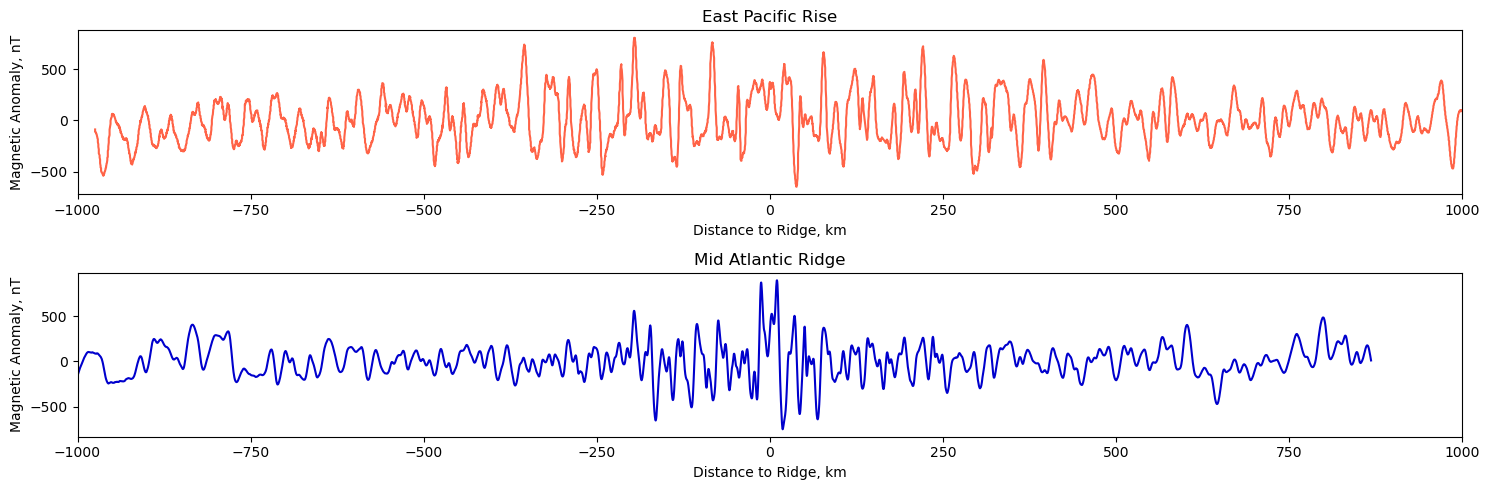

In [80]:
plt.figure(1,(15,5))
ax1 = plt.subplot(2,1,1)
ax1.plot(projected_pacific_data['DIST'],pac_mma,color='tomato'); # plot the pacific marine magnetic anomaly
ax1.set_xlim(-1000, 1000);
ax1.set_xlabel('Distance to Ridge, km');
ax1.set_ylabel('Magnetic Anomaly, nT');
ax1.set_title('East Pacific Rise');

ax2 = plt.subplot(2,1,2)
ax2.plot(projected_atlantic_data['DIST'],atl_mma,color='mediumblue'); # plot the atlantic marine magnetic anomaly
ax2.set_xlim(-1000, 1000);
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Magnetic Anomaly, nT');
ax2.set_title('Mid Atlantic Ridge');

plt.tight_layout()

<font color=goldenrod>**_Code for you to write_**</font>
- Plot the marine magnetic anomalies together as subplots 
- Use `xlim` to set limits between -100 and 100 km
- Plot a horizontal line at y=0 using `ax1.hlines(0,-100,100,color='black')`
- `ax1.set_xticks(np.arange(-100,100,10))`

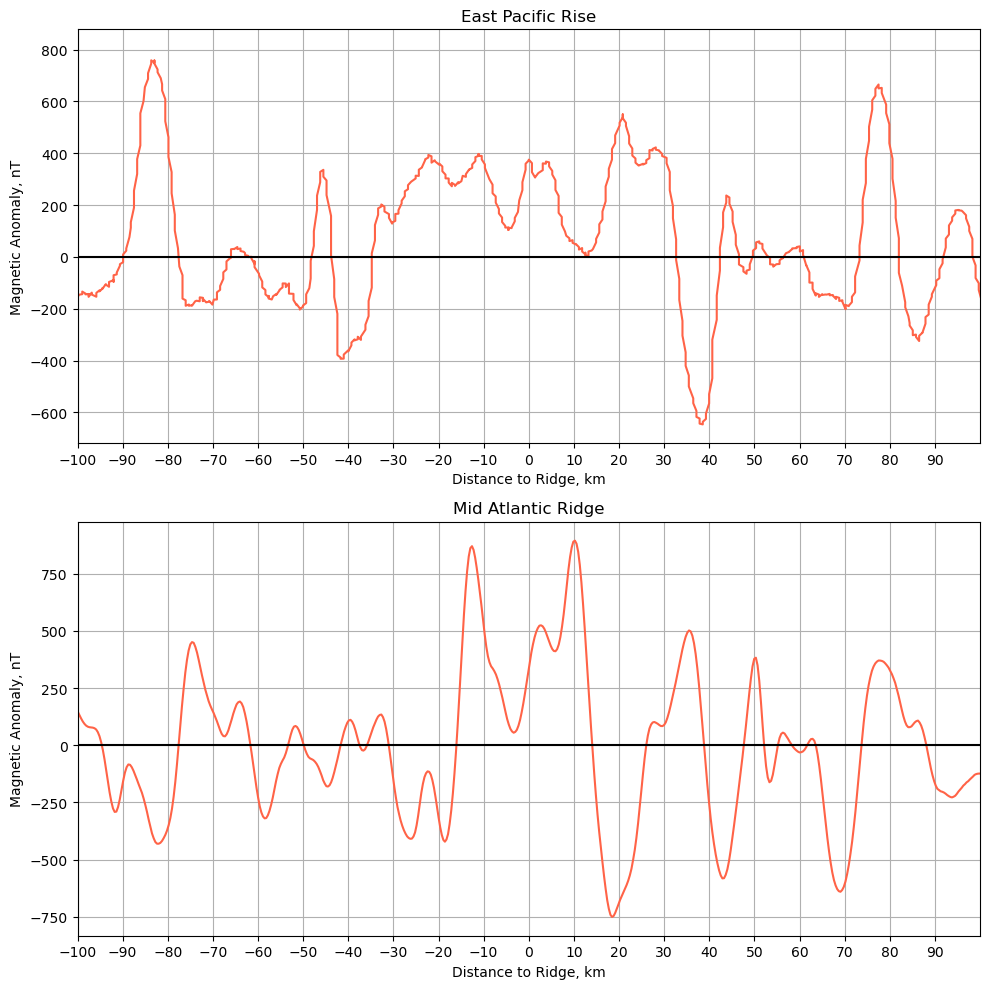

In [83]:
plt.figure(1,(10,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(projected_pacific_data['DIST'],pac_mma,color='tomato')
ax1.set_xlabel('Distance to Ridge, km');
ax1.set_ylabel('Magnetic Anomaly, nT');
ax1.set_title('East Pacific Rise');
ax1.set_xlim(-100,100)
ax1.hlines(0,-100,100,color='black')
ax1.set_xticks(np.arange(-100,100,10))
ax1.grid()

ax2 = plt.subplot(2,1,2)
ax2.plot(projected_atlantic_data['DIST'],atl_mma,color='tomato')
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Magnetic Anomaly, nT');
ax2.set_title('Mid Atlantic Ridge');
ax2.set_xlim(-100,100)
ax2.set_xticks(np.arange(-100,100,10))
ax2.hlines(0,-100,100,color='black')
ax2.grid()

plt.tight_layout()

<img src="Figures/marine_mag_anom.png" width=900>
> Source: Fundamentals of Geophysics (2nd Edition) Lowrie, W.

<font color=red>**_Discussion question:_**</font> Which wiggles can you match between lines and to the model profile due to the GPTS above? Can you pick the Bruhnes, Matuyama, Gauss, and Gilbet polarity chrons? What distance from the ridge does the Bruhnes-Matuyama reversal (which tells us an age of 776 kyr) occur at for both ridges? Zoom in on your plots and write down the distance to the ridge.

<font color=goldenrod>**_Code for you to write_**</font>
- Define a function that you can use to calculate the spreading rate in km/Myr given some distance and age
- Ensure it takes the distance and age as arguments
- Add a docstring that indicates what units the calculated rate is in.

In [90]:
def calc_rate(distance, age):
    '''
    Calculates Rate

    variables:
        distance (numeric): Distance from 
        age (numeric): years in Myr
    returns:
        rate (numeric): the rate in km/Myr
    '''
    try:
        rate = distance/age
        return rate
    except:
        print('something went wrong')

- Test your function to calculate the spreading rate for each of the Pacific and Atlantic plates
- Use the distance from the ridge of the Bruhnes-Matuyama reversal. This reversal occurred 776,000 years ago (Singer et al. 2019). 

You can find helpful information about functions here (part of your weekly reading): https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html

In [120]:
projected_atlantic_data['mag_anom']= total_to_anomaly(projected_atlantic_data['MAG_TOT'], projected_atlantic_data['DIST'])
projected_atlantic_data['Sign'] = np.sign(projected_atlantic_data['mag_anom'])
atl_reversals = projected_atlantic_data[projected_atlantic_data['Sign'].diff().fillna(0).ne(0)]
atl_reversals[atl_reversals['DIST']>0]

# projected_pacific_data['mag_anom']= total_to_anomaly(projected_pacific_data['MAG_TOT'], projected_pacific_data['DIST'])
projected_pacific_data['mag_anom']= total_to_anomaly(projected_pacific_data['MAG_TOT'], projected_pacific_data['DIST'])
projected_pacific_data['Sign'] = np.sign(projected_pacific_data['mag_anom'])
pac_reversals = projected_pacific_data[projected_pacific_data['Sign'].diff().fillna(0).ne(0)]
pac_reversals[pac_reversals['DIST']>0]


,DIST,DEPTH,MAG_TOT,mag_anom,Sign
88,1290.700,4784.1,39537,5.321484,1.0
102,1285.800,4721.9,39448,-16.023784,-1.0
212,1248.800,4653.3,39606,11.796948,1.0
257,1233.300,4511.3,39716,-10.501093,-1.0
368,1196.700,4484.6,39601,12.702337,1.0
...,...,...,...,...,...
3569,52.769,2815.9,43685,5.792473,1.0
3579,48.973,2779.6,43697,-29.010344,-1.0
3586,46.584,2642.6,43786,9.717644,1.0
3598,42.362,2867.9,43874,-52.610893,-1.0


In [115]:
atl_reversals = projected_atlantic_data[projected_atlantic_data['mag_anom']==0]
atl_reversals

,DIST,DEPTH,MAG_TOT,mag_anom


In [121]:

atl_spread_rate = calc_rate(14,776000)  *1000000
pac_spread_rate = calc_rate(32,776000)  *1000000
print(atl_spread_rate,pac_spread_rate)

18.04123711340206 41.23711340206186


The values should be on the order of **20 mm/yr** for the Atlantic and **45 mm/yr** for the Pacific

<font color=red>**_Discussion question:_**</font> 
Based on the marine magnetic anomalies, which spreading center do you think is spreading faster the Atlantic (blue) or Pacific (red)? Is that consistent with your estimate from the bathymetry?

<font color=blue>**_Response:_**</font> The Pacific is faster and that is consistent with bathymetry.

**Write your answer here.**

### Turn in this notebook

Save your completed notebook, print the file to PDF, and upload the PDF on Blackboard.